In [2]:
import lsst.daf.persistence as dafPersist
import re
import pickle
import astropy.coordinates as coord
import astropy.units as u
import Utils.DiaSourceTools as DSTools


from astropy.io import ascii
import glob
import matplotlib.pyplot as plt
import numpy as np

import multiprocessing

import sncosmo

In [18]:
DATADIR="/datadec/cppm/jpreyes/CFHT"
butler_tests = dafPersist.Butler(DATADIR+"_Tests/tests") 
butler_control = dafPersist.Butler(DATADIR+"_Control/control") 

In [4]:
days = []
with open(DATADIR+"_Tests/days_04.txt", "rb") as dayFile:
    for line in dayFile:
            line = line.replace('\n','')
            #text = re.split("=| ",line)
            days.append(line)

patches= []
with open(DATADIR+"_Tests/patches.txt", "rb") as patches_file:
    for line in patches_file:
            line = line.replace('\n','')
            text = re.split("=| ",line)
            patches.append(text[-1])

In [5]:
actual_patches = []


for patch in patches:
        if butler_tests.datasetExists("deepCoadd_calexp", dataId={"tract":0, "patch":patch, "filter":"r"}) == True:
            actual_patches.append(patch)

In [6]:
actual_patches

['5,7',
 '5,8',
 '5,9',
 '5,12',
 '5,13',
 '5,14',
 '5,15',
 '5,16',
 '5,17',
 '5,18',
 '5,19',
 '5,21',
 '5,22',
 '6,6',
 '6,7',
 '6,8',
 '6,9',
 '6,10',
 '6,11',
 '6,12',
 '6,13',
 '6,14',
 '6,15',
 '6,16',
 '6,17',
 '6,18',
 '6,19',
 '6,20',
 '6,21',
 '6,22',
 '6,23',
 '6,24',
 '7,6',
 '7,7',
 '7,8',
 '7,9',
 '7,10',
 '7,11',
 '7,12',
 '7,13',
 '7,14',
 '7,15',
 '7,16',
 '7,17',
 '7,18',
 '7,19',
 '7,20',
 '7,21',
 '7,22',
 '7,23',
 '7,24',
 '8,6',
 '8,7',
 '8,8',
 '8,9',
 '8,10',
 '8,11',
 '8,12',
 '8,13',
 '8,14',
 '8,15',
 '8,16',
 '8,17',
 '8,18',
 '8,19',
 '8,20',
 '8,21',
 '8,22',
 '8,23',
 '8,24',
 '9,6',
 '9,7',
 '9,8',
 '9,9',
 '9,10',
 '9,11',
 '9,12',
 '9,13',
 '9,14',
 '9,15',
 '9,16',
 '9,17',
 '9,18',
 '9,19',
 '9,20',
 '9,21',
 '9,22',
 '9,23',
 '9,24',
 '10,6',
 '10,7',
 '10,8',
 '10,9',
 '10,10',
 '10,11',
 '10,12',
 '10,13',
 '10,14',
 '10,15',
 '10,16',
 '10,17',
 '10,18',
 '10,19',
 '10,20',
 '10,21',
 '10,22',
 '10,23',
 '10,24',
 '11,6',
 '11,7',
 '11,8',
 '11,

In [19]:
day="2004-04-14"
srcs_test = []
srcs_control = []

for patch in actual_patches:
    dataId = {"tract":0, "date":day, "patch":patch, "filter":"r"}
    
    if butler_tests.datasetExists("dayDiff_class_diaSrc",dataId=dataId) and butler_control.datasetExists("dayDiff_class_diaSrc",dataId=dataId):
    
        cls_srcs_tests = butler_tests.get("dayDiff_class_diaSrc",dataId=dataId)
        srcs_test.append(len(cls_srcs_tests))
        cls_srcs_control = butler_control.get("dayDiff_class_diaSrc",dataId=dataId)
        srcs_control.append(len(cls_srcs_control))

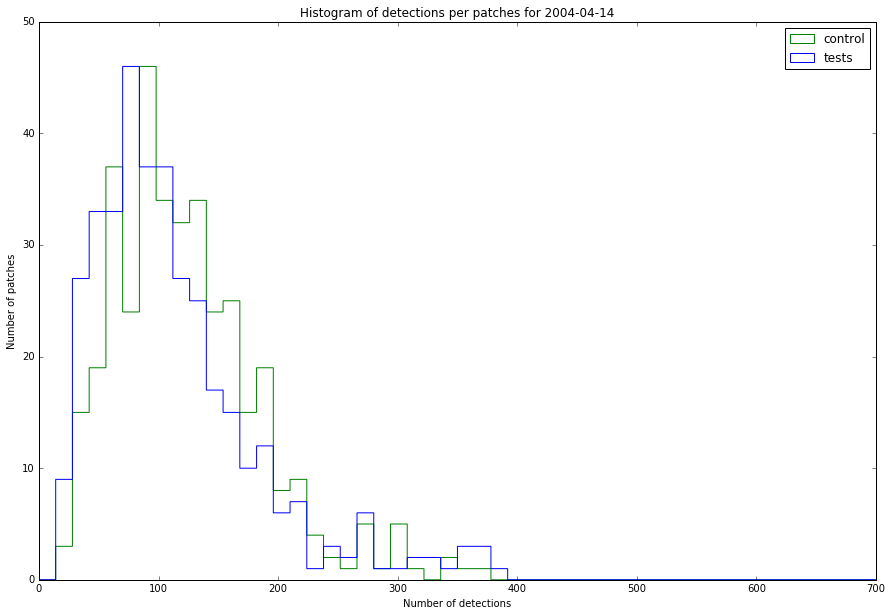

In [20]:
plt.figure(figsize=(15,10))
plt.hist(srcs_control, bins=50, range=(0,700), color="green",histtype="step", label="control")
plt.hist(srcs_test, bins=50, range=(0,700), color="blue",histtype="step", label="tests")

plt.xlim(xmax=700)
plt.title("Histogram of detections per patches for 2004-04-14")
plt.ylabel("Number of patches")
plt.xlabel("Number of detections")
plt.legend()
plt.show()

In [21]:
len(srcs_control)

367

In [22]:
srcs_test = []
srcs_control = []
problematic = []
for day in days:
    for patch in actual_patches:
        dataId = {"tract":0, "date":day, "patch":patch, "filter":"r"}

        if butler_tests.datasetExists("dayDiff_class_diaSrc",dataId=dataId) and butler_control.datasetExists("dayDiff_class_diaSrc",dataId=dataId):

            cls_srcs_tests = butler_tests.get("dayDiff_class_diaSrc",dataId=dataId)
            srcs_test.append(len(cls_srcs_tests))
            cls_srcs_control = butler_control.get("dayDiff_class_diaSrc",dataId=dataId)
            srcs_control.append(len(cls_srcs_control))
            if len(cls_srcs_tests)>len(cls_srcs_control):
                problematic.append((day, patch))

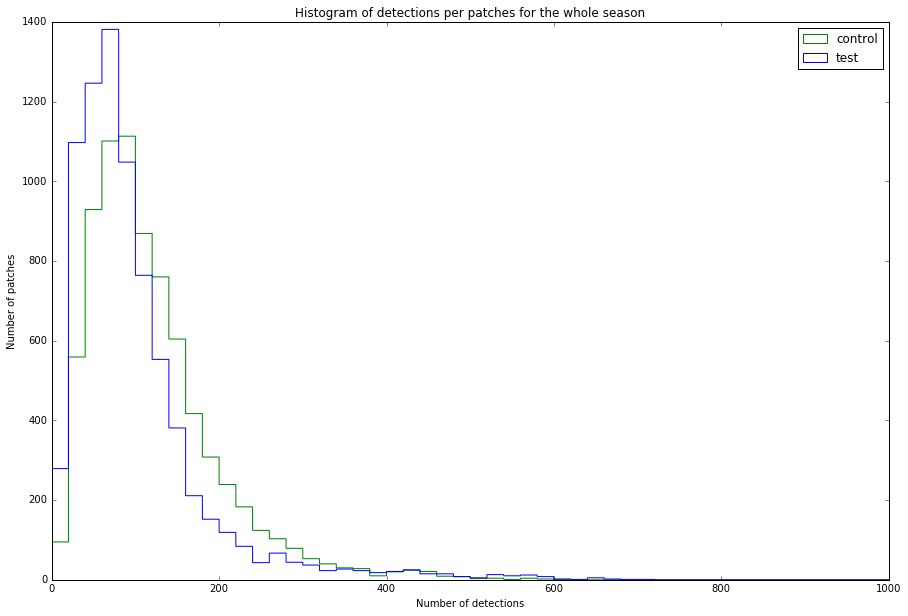

In [23]:
plt.figure(figsize=(15,10))
x_max= 1000
plt.hist(srcs_control, bins=50, range=(0,x_max), color="green",histtype="step", label="control")
plt.hist(srcs_test, bins=50, range=(0,x_max), color="blue",histtype="step", label="test")

plt.xlim(xmax=x_max)
plt.title("Histogram of detections per patches for the whole season")
plt.ylabel("Number of patches")
plt.xlabel("Number of detections")
plt.legend()
plt.show()

In [13]:
len(srcs_control)

7740

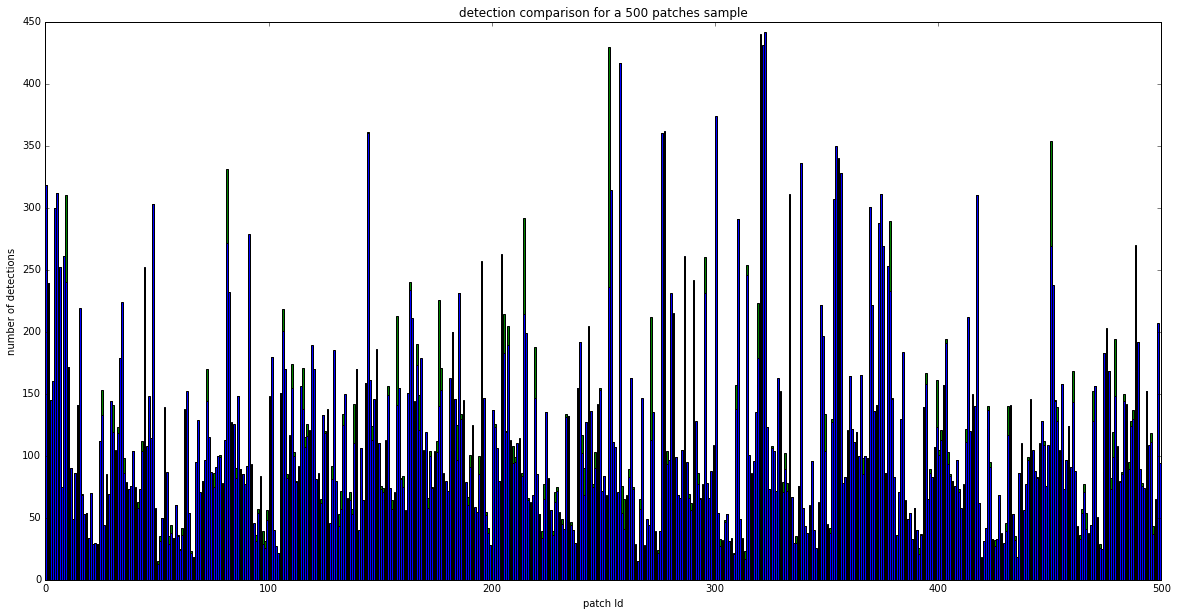

In [17]:
plt.figure(figsize=(20,10))
plt.bar(range(len(srcs_control[:500])),srcs_control[:500], color="green", label="control")
plt.bar(range(len(srcs_test[:500])),srcs_test[:500], color="blue", label="tests")

plt.title("detection comparison for a 500 patches sample")
plt.xlabel("patch Id")
plt.ylabel("number of detections")

plt.show()

In [53]:
problematic

[('2004-03-19', '5,7'),
 ('2004-03-19', '5,8'),
 ('2004-03-19', '5,9'),
 ('2004-03-19', '5,13'),
 ('2004-03-19', '5,14'),
 ('2004-03-19', '5,18'),
 ('2004-03-19', '5,21'),
 ('2004-03-19', '6,6'),
 ('2004-03-19', '6,8'),
 ('2004-03-19', '6,10'),
 ('2004-03-19', '6,11'),
 ('2004-03-19', '6,14'),
 ('2004-03-19', '6,15'),
 ('2004-03-19', '6,16'),
 ('2004-03-19', '6,17'),
 ('2004-03-19', '6,18'),
 ('2004-03-19', '6,19'),
 ('2004-03-19', '6,20'),
 ('2004-03-19', '6,22'),
 ('2004-03-19', '6,23'),
 ('2004-03-19', '7,8'),
 ('2004-03-19', '7,12'),
 ('2004-03-19', '7,15'),
 ('2004-03-19', '7,16'),
 ('2004-03-19', '7,17'),
 ('2004-03-19', '7,18'),
 ('2004-03-19', '7,19'),
 ('2004-03-19', '7,22'),
 ('2004-03-19', '7,23'),
 ('2004-03-19', '7,24'),
 ('2004-03-19', '8,14'),
 ('2004-03-19', '8,15'),
 ('2004-03-19', '8,16'),
 ('2004-03-19', '8,17'),
 ('2004-03-19', '8,18'),
 ('2004-03-19', '8,19'),
 ('2004-03-19', '8,20'),
 ('2004-03-19', '8,21'),
 ('2004-03-19', '8,22'),
 ('2004-03-19', '8,24'),
 ('200

In [54]:
dataId = {"tract":0, "date":'2004-04-26', "patch":'10,15', "filter":"r"}
c_tests = butler_tests.get("dayDiff_class_diaSrc",dataId=dataId)
c_control = butler_control.get("dayDiff_class_diaSrc",dataId=dataId)

In [55]:
len(c_tests), len(c_control)

(444, 210)

In [56]:
t_patches = ["14,14","15,15","14,15","12,12","16,16","17,17","14,17","15,17","16,17","15,14", "12,13","12,14","12,15","12,16","12,17","13,13","13,14","13,15","13,16","13,17"]


In [75]:

days_dict = {}
for day in days:
    srcs_test_1 = []
    srcs_control_1 = []
    for patch in t_patches:
        dataId = {"tract":0, "date":day, "patch":patch, "filter":"r"}

        if butler_tests.datasetExists("dayDiff_class_diaSrc",dataId=dataId) and butler_control.datasetExists("dayDiff_class_diaSrc",dataId=dataId):

            cls_srcs_tests = butler_tests.get("dayDiff_class_diaSrc",dataId=dataId)
            srcs_test_1.append(len(cls_srcs_tests))
            cls_srcs_control = butler_control.get("dayDiff_class_diaSrc",dataId=dataId)
            srcs_control_1.append(len(cls_srcs_control))
    
    days_dict[day] = (srcs_test_1, srcs_control_1)

In [72]:
days_dict.keys()

['2004-04-14',
 '2004-04-17',
 '2004-06-13',
 '2004-07-07',
 '2004-07-09',
 '2004-03-19',
 '2004-05-24',
 '2004-05-09',
 '2004-06-19',
 '2004-05-21',
 '2004-03-16',
 '2004-03-17',
 '2004-03-30',
 '2004-06-09',
 '2004-04-26',
 '2004-04-21',
 '2004-04-22',
 '2004-05-26',
 '2004-04-28',
 '2004-06-26',
 '2004-06-22',
 '2004-06-21',
 '2004-07-14',
 '2004-07-16',
 '2004-07-11',
 '2004-07-12',
 '2004-05-13',
 '2004-07-18']

In [76]:
days_dict['2004-04-14']

([208,
  136,
  325,
  113,
  452,
  134,
  383,
  232,
  366,
  164,
  331,
  174,
  213,
  486,
  273,
  476,
  455,
  338,
  177,
  172],
 [174,
  227,
  204,
  139,
  220,
  141,
  236,
  154,
  226,
  210,
  175,
  223,
  296,
  284,
  280,
  139,
  183,
  233,
  218,
  215])

In [78]:
days_dict['2004-06-13']

([188,
  136,
  281,
  74,
  347,
  160,
  235,
  205,
  359,
  93,
  256,
  135,
  175,
  333,
  201,
  483,
  397,
  196,
  150,
  85],
 [135,
  176,
  239,
  135,
  209,
  169,
  142,
  132,
  230,
  137,
  147,
  185,
  150,
  129,
  98,
  205,
  139,
  197,
  127,
  107])

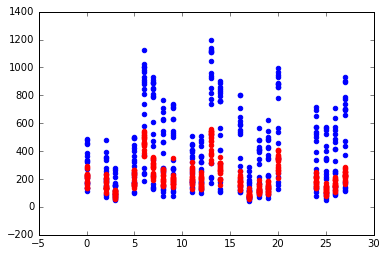

In [79]:


for i, day in enumerate(days_dict.keys()):
        test_arr, control_arr = days_dict[day]
        plt.scatter([i]*len(test_arr),test_arr, color="blue")
        plt.scatter([i]*len(control_arr),control_arr, color="red")
        
plt.show()

In [81]:
test_days =  ["2005-02-10"]
for i, day in enumerate(test_days):
        test_arr, control_arr = days_dict[day]
        plt.scatter([i]*len(test_arr),test_arr, color="blue")
        plt.scatter([i]*len(control_arr),control_arr, color="red")
        
plt.show()

KeyError: '2005-02-10'

In [65]:
a,b = days_dict[day]

In [66]:
a

[227,
 172,
 338,
 107,
 494,
 158,
 402,
 246,
 424,
 211,
 368,
 182,
 250,
 441,
 291,
 495,
 504,
 325,
 175,
 103,
 196,
 175,
 406,
 139,
 409,
 106,
 394,
 234,
 368,
 180,
 324,
 162,
 249,
 445,
 275,
 509,
 449,
 350,
 177,
 146,
 564,
 199,
 798,
 107,
 833,
 306,
 758,
 889,
 863,
 131,
 815,
 117,
 516,
 758,
 762,
 846,
 902,
 411,
 406,
 178,
 208,
 136,
 325,
 113,
 452,
 134,
 383,
 232,
 366,
 164,
 331,
 174,
 213,
 486,
 273,
 476,
 455,
 338,
 177,
 172,
 610,
 165,
 796,
 131,
 846,
 337,
 811,
 912,
 886,
 140,
 888,
 135,
 519,
 787,
 854,
 892,
 928,
 433,
 475,
 232,
 278,
 137,
 498,
 76,
 631,
 236,
 530,
 515,
 628,
 108,
 547,
 116,
 339,
 733,
 706,
 740,
 719,
 275,
 275,
 178,
 119,
 69,
 191,
 43,
 224,
 57,
 114,
 73,
 171,
 66,
 157,
 63,
 113,
 181,
 122,
 283,
 254,
 137,
 70,
 59,
 260,
 140,
 416,
 84,
 554,
 144,
 417,
 260,
 485,
 92,
 525,
 102,
 326,
 573,
 464,
 712,
 637,
 245,
 245,
 123,
 844,
 277,
 969,
 236,
 979,
 582,
 878,
 1126,
 1

In [24]:
a = [1,2,3,4,5,6]

In [27]:
a[:2]

[1, 2]